## PCA for Image Compression

The goal is to use PCA for image compression in Python.

Loading an image of the famous painting "The Starry Night" by Vincent Van Gogh, and store it as an RGB-image.

In [8]:


import numpy as np
from skimage import io
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [9]:
url = "https://upload.wikimedia.org/wikipedia/commons/thumb/e/ea/Van_Gogh_-_Starry_Night_-_Google_Art_Project.jpg/1364px-Van_Gogh_-_Starry_Night_-_Google_Art_Project.jpg"

img = io.imread(url)
io.imsave('a.jpg',img)
img.shape

(1080, 1364, 3)

In [10]:
r =  img[ : , : , 0 ]
g = img[ : , : , 1 ]
b = img[ : , : , 2 ]


Applying PCA to compress the image.

In [11]:
def compress_image(image, number_of_components=None, keep_pca_objects=False):
  """
  Uses PCA to compress a multi-channel image.

  Parameters
  ----------
  image : numpy.ndarray
    The image to compress
  number_of_components : int, optional
    The number of principal components to use for compression. If None, keeps all
  keep_pca_objects : bool, optional
    If True, a list of PCA objects will be returned alongside the compressed
    image. The default is False.

  Returns
  -------
  compressed_image : numpy.ndarray
  pca_objects : list, optional (see argument keep_pca_objects)
  """
  list_of_compressed_channels = list()
  list_of_pca_objects = list()
  

  for i in range(image.shape[2]):

    channel_data = image[:,:,i]

    
   
    pca = PCA(number_of_components)
    pca= pca.fit(channel_data)
    compressed_channel_data = pca.inverse_transform(pca.transform(channel_data))
    
    if keep_pca_objects:
      list_of_pca_objects.append(pca)
    
    list_of_compressed_channels.append(compressed_channel_data)
  
  compressed_image = np.stack(list_of_compressed_channels, axis=2)
  

  compressed_image = (compressed_image - np.min(compressed_image))
  compressed_image = (compressed_image * 255 / np.max(compressed_image))  \
                     .astype(np.uint8)
                     
  returns = None
  if keep_pca_objects:
    returns = compressed_image, list_of_pca_objects
  else:
    returns = compressed_image
  return returns

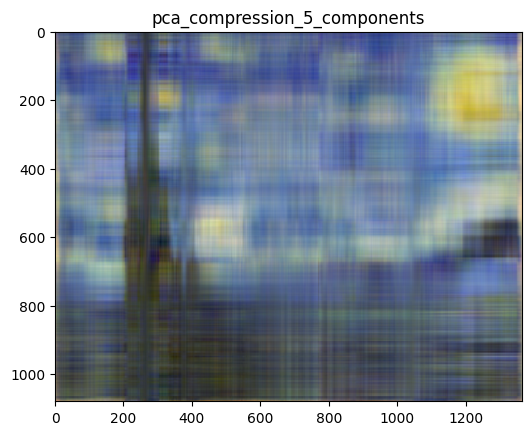

In [12]:
cimg = compress_image(img, 5)
plt.title("pca_compression_5_components")
plt.imshow(cimg);

Applying PCA for $n\in\{1, 2, 5, 10, 20\}$ and saving the compressed image in each iteration.

In [13]:
for  i in [1,2,3,5,10,15,20] : 
    cimg = compress_image(img, i)
    io.imsave(('a{}.jpg'.format(i)),cimg)

Determining a reasonable number of clusters using the "elbow criterion". For this purpose, we create a scree plot that plots the explained variance of each component against the number of components, e.g. for $n\in[1, ..., 10]$.

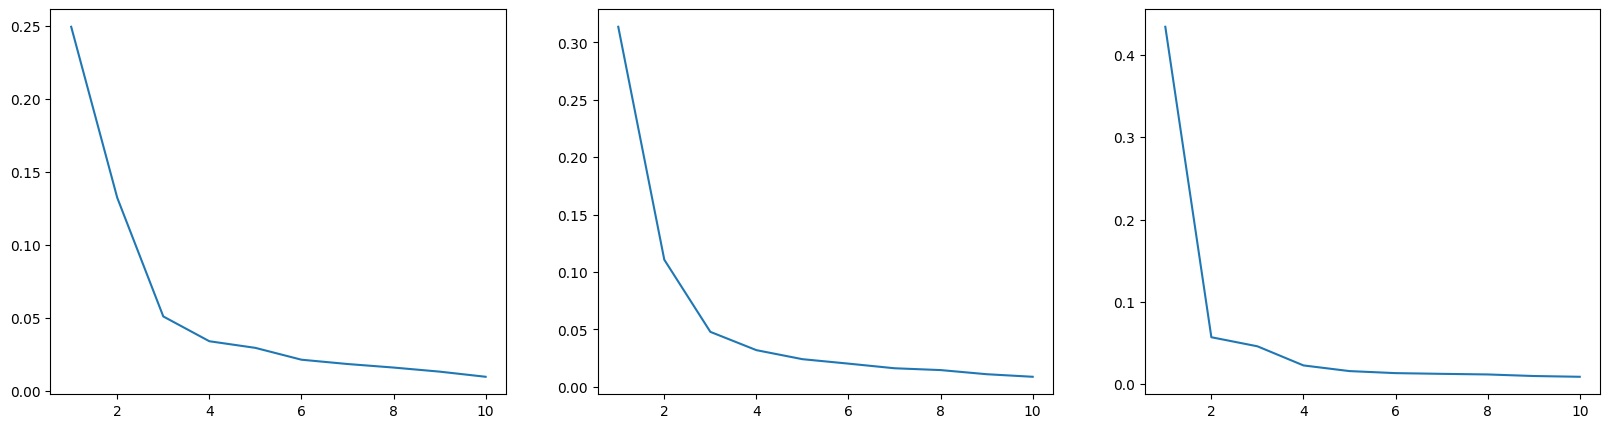

In [17]:
cimg = compress_image(img, 10,True)
fig, axs = plt.subplots(1, 3, figsize=(20, 5))
for i in range (0,3) :
    axs[i].plot([ i for i in range (1,11)], cimg[1][i].explained_variance_ratio_)
